Prova 2 de Física Computacional - Grupo 10

Nome: Augusto Paulo Schmidt
RA: 791333


Nome: Breno Henrique de Oliveira
RA: 802226


Nome: Júlio Rangel dos Santos Pinto
RA: 813162

Exercício 1 - O passo do bêbado e o transporte eletrônico

Menor tempo de saída pela direita: 14 passos
Maior tempo de saída pela direita: 408 passos


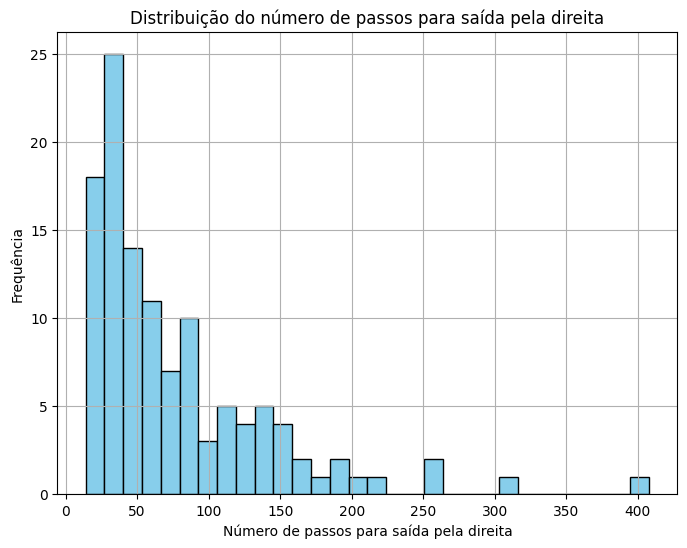

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

L = 10
p = 0.45
n_passos = 10000
n_sim = 1000

passos_saida_direita = []

for i in range(n_sim):
    pos = 0
    for passo in range(1, n_passos + 1):
        if np.random.rand() < p:
            pos += 1
        else:
            pos -= 1

        if pos == L or pos == -L:
            if pos == L:
                passos_saida_direita.append(passo)
            break

if passos_saida_direita:
    menor_tempo = np.min(passos_saida_direita)
    maior_tempo = np.max(passos_saida_direita)
    print("Menor tempo de saída pela direita:", menor_tempo, "passos")
    print("Maior tempo de saída pela direita:", maior_tempo, "passos")
else:
    print("Nenhum elétron saiu pela direita.")

plt.figure(figsize=(8,6))
plt.hist(passos_saida_direita, bins=30, edgecolor='black', color='skyblue')
plt.xlabel("Número de passos para saída pela direita")
plt.ylabel("Frequência")
plt.title("Distribuição do número de passos para saída pela direita")
plt.grid(True)
plt.show()


Exercício 2 - Soluções da Equação de Laplace em coordenadas cartesianas

Não convergiu após o número máximo de iterações.


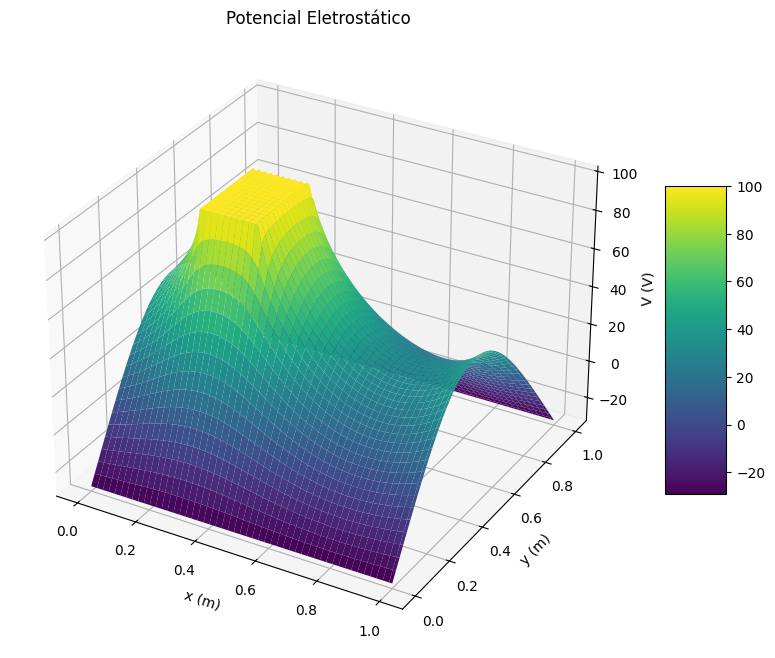

Campo elétrico no centro do domínio (E_x, E_y): (260.86177634526626, 31.54771063364249)
Diferença de potencial entre (0.50, 0.50) e (0.70, 0.70): -48.59 V


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # para plotagem 3D
from matplotlib import cm

# =============================================================================
# Parâmetros e definição da malha
# =============================================================================
nx, ny = 100, 100          # número de pontos em x e y
Lx, Ly = 1.0, 1.0          # dimensões do domínio (m)
dx = Lx / (nx - 1)         # espaçamento em x
dy = Ly / (ny - 1)         # espaçamento em y

# Vetores de coordenadas e malha 2D
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

# =============================================================================
# Inicialização da matriz potencial V
# =============================================================================
V = np.zeros((ny, nx))

# Condições de contorno:
# - Borda inferior (y=0) e superior (y=Ly) com V = -30 V.
V[0, :] = -30
V[-1, :] = -30

# - Condição periódica em x: a implementação usará np.roll para "enrolar" os vizinhos.
# - Retângulo fixo: 0.20 ≤ x ≤ 0.40 e 0.30 ≤ y ≤ 0.60 com V = 100 V.
mask_rect = (X >= 0.20) & (X <= 0.40) & (Y >= 0.30) & (Y <= 0.60)
V[mask_rect] = 100

# Máscara booleana para os pontos com potencial fixo (borda em y e retângulo interno)
fixed_mask = np.zeros_like(V, dtype=bool)
fixed_mask[0, :] = True
fixed_mask[-1, :] = True
fixed_mask[mask_rect] = True

# =============================================================================
# Iteração para solução da equação de Laplace (método de Jacobi com condições periódicas)
# =============================================================================
max_iter = 5000
tolerance = 1e-5

for it in range(max_iter):
    # Cálculo da média dos 4 vizinhos. Para a direção x usamos np.roll para impor periodicidade.
    V_new = 0.25 * (np.roll(V, 1, axis=0) + np.roll(V, -1, axis=0) +
                    np.roll(V, 1, axis=1) + np.roll(V, -1, axis=1))
    # Reimpor as condições fixas
    V_new[fixed_mask] = V[fixed_mask]

    # Verifica convergência
    err = np.max(np.abs(V_new - V))
    V = V_new.copy()
    if err < tolerance:
        print(f"Convergiu após {it} iterações (erro = {err:.2e}).")
        break
else:
    print("Não convergiu após o número máximo de iterações.")

# =============================================================================
# (a) Gráfico 3D do potencial eletrostático
# =============================================================================
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, V, cmap=cm.viridis, edgecolor='none')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('V (V)')
ax.set_title('Potencial Eletrostático')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# =============================================================================
# (b) Cálculo do campo elétrico E = -∇V no centro do domínio
# =============================================================================
# Calcula as derivadas parciais. Note que, para uma matriz V de dimensão (ny, nx),
# np.gradient retorna [dV/dy, dV/dx] se passarmos (dy, dx) como espaçamentos.
dV_dy, dV_dx = np.gradient(V, dy, dx)
Ex = -dV_dx
Ey = -dV_dy

# Índices correspondentes ao centro (x = 0.5, y = 0.5)
ix_center = np.argmin(np.abs(x - 0.5))
iy_center = np.argmin(np.abs(y - 0.5))
E_center = (Ex[iy_center, ix_center], Ey[iy_center, ix_center])
print("Campo elétrico no centro do domínio (E_x, E_y):", E_center)

# =============================================================================
# (c) Diferença de potencial entre (0.50, 0.50) e (0.70, 0.70)
# =============================================================================
ix1 = np.argmin(np.abs(x - 0.50))
iy1 = np.argmin(np.abs(y - 0.50))
ix2 = np.argmin(np.abs(x - 0.70))
iy2 = np.argmin(np.abs(y - 0.70))
delta_V = V[iy2, ix2] - V[iy1, ix1]
print("Diferença de potencial entre (0.50, 0.50) e (0.70, 0.70): {:.2f} V".format(delta_V))


**Exercício 3** - Solução Numérica da Equação de Onda com Densidade Variável

**OBS.:** Existe uma animação no código abaixo. Embora ela não funcione no colab, é muito interessante observá-la. Executando no PyCharm, por exemplo, ela rodou sem problemas.

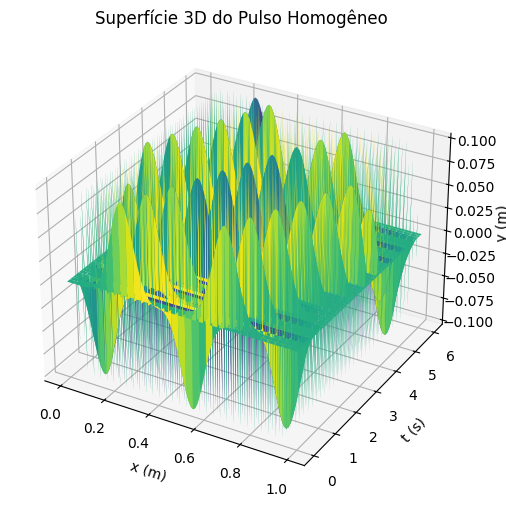

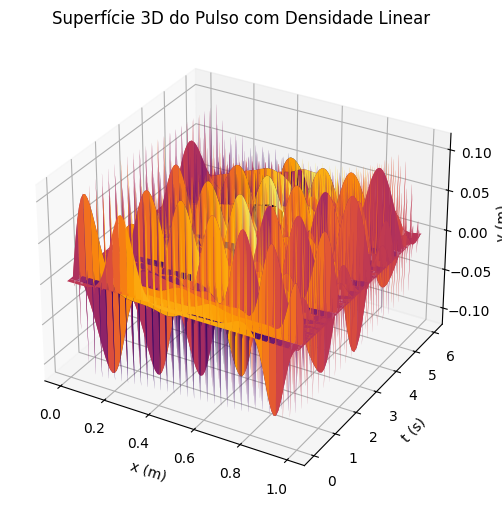

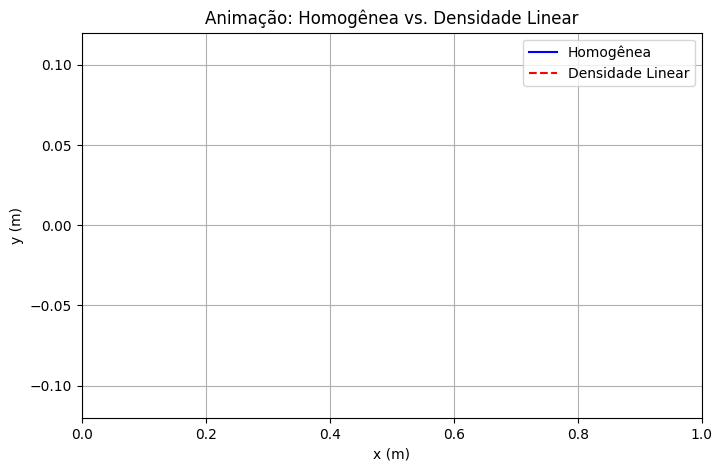

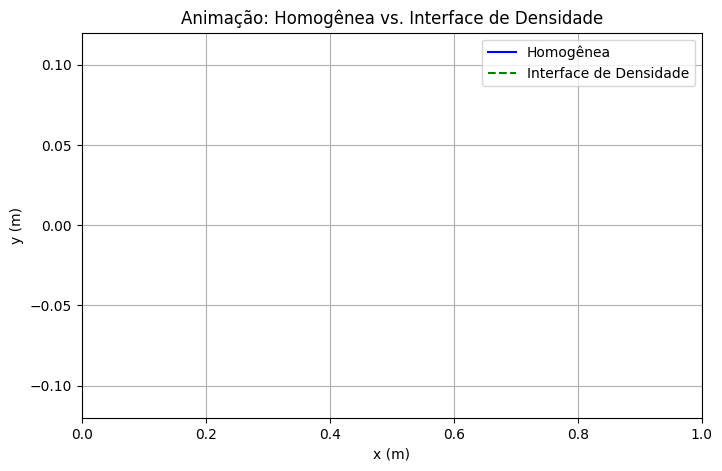

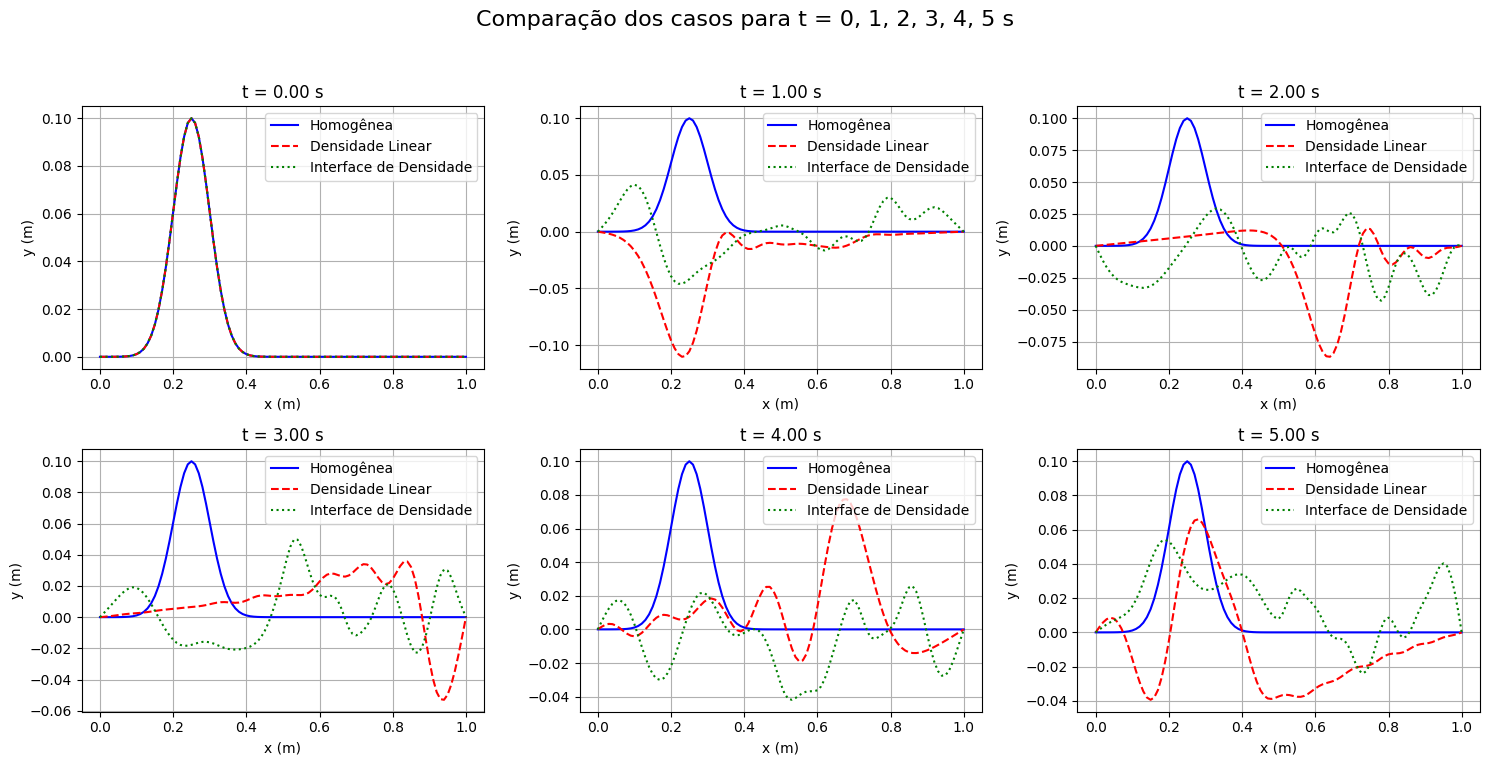

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necessário para gráficos 3D
from matplotlib import cm
import matplotlib.animation as animation

# =============================================================================
# Parâmetros Comuns
# =============================================================================
L = 1.0  # comprimento da corda (m)
rho0 = 0.01  # densidade linear base (kg/m)
T = 1.0  # tensão (N)
dx = 0.01  # passo espacial (m)
dt = 0.001  # passo temporal (s)
t_max = 6.0  # tempo máximo (s)
sigma = 0.05  # parâmetro do pulso gaussiano (m)
A = 0.1  # amplitude do pulso
v = np.sqrt(T / rho0)  # velocidade natural para densidade homogênea (10 m/s)

# Malha espacial e temporal
x = np.arange(0, L + dx, dx)
nx = len(x)
t = np.arange(0, t_max + dt, dt)
nt = len(t)

# =============================================================================
# (a) Solução Homogênea (ρ(x) = ρ₀)
# =============================================================================
# Condição inicial do pulso gaussiano
y0 = A * np.exp(-((x - L / 4) ** 2) / (2 * sigma ** 2))
# Condição inicial para a velocidade (pulso viajante para a direita)
y_t0 = v * (x - L / 4) / (sigma ** 2) * y0

# Inicialização dos arrays para o método das diferenças finitas
y_prev = y0.copy()
y_curr = np.zeros_like(x)
y_next = np.zeros_like(x)

# Coeficiente de atualização (para ρ₀ constante, C deve ser 1)
C = T * dt ** 2 / (rho0 * dx ** 2)
# Inicialização para t = dt via expansão de Taylor
y_curr[1:-1] = y0[1:-1] + dt * y_t0[1:-1] + 0.5 * C * (y0[2:] - 2 * y0[1:-1] + y0[:-2])
y_curr[0] = 0
y_curr[-1] = 0

# Armazenamento da solução (gráfico de superfície)
Y_surface = np.zeros((nt, nx))
Y_surface[0, :] = y0
Y_surface[1, :] = y_curr

# Evolução temporal para a corda homogênea
for n in range(1, nt - 1):
    y_next[1:-1] = (2 * y_curr[1:-1] - y_prev[1:-1] +
                    C * (y_curr[2:] - 2 * y_curr[1:-1] + y_curr[:-2]))
    y_next[0] = 0
    y_next[-1] = 0  # condições de contorno fixas
    Y_surface[n + 1, :] = y_next
    y_prev, y_curr = y_curr, y_next.copy()

# =============================================================================
# (b) Solução com Densidade Linearmente Variável: ρ(x) = ρ₀ (1 + α x)
# =============================================================================
alpha = 1.5  # m⁻¹
rho_linear = rho0 * (1 + alpha * x)

# Condição inicial idêntica
y0_lin = A * np.exp(-((x - L / 4) ** 2) / (2 * sigma ** 2))
y_t0_lin = v * (x - L / 4) / (sigma ** 2) * y0_lin

# Inicialização dos arrays
y_prev_lin = y0_lin.copy()
y_curr_lin = np.zeros_like(x)
y_next_lin = np.zeros_like(x)

# Coeficiente de atualização dependente de x
C_lin = T * dt ** 2 / (rho_linear * dx ** 2)
y_curr_lin[1:-1] = (y0_lin[1:-1] + dt * y_t0_lin[1:-1] +
                    0.5 * C_lin[1:-1] * (y0_lin[2:] - 2 * y0_lin[1:-1] + y0_lin[:-2]))
y_curr_lin[0] = 0
y_curr_lin[-1] = 0

# Armazenamento da solução
Y_surface_lin = np.zeros((nt, nx))
Y_surface_lin[0, :] = y0_lin
Y_surface_lin[1, :] = y_curr_lin

for n in range(1, nt - 1):
    y_next_lin[1:-1] = (2 * y_curr_lin[1:-1] - y_prev_lin[1:-1] +
                        C_lin[1:-1] * (y_curr_lin[2:] - 2 * y_curr_lin[1:-1] + y_curr_lin[:-2]))
    y_next_lin[0] = 0
    y_next_lin[-1] = 0
    Y_surface_lin[n + 1, :] = y_next_lin
    y_prev_lin, y_curr_lin = y_curr_lin, y_next_lin.copy()

# =============================================================================
# (d) Solução para Corda com Interface de Densidade
# Para x < L/2, ρ = ρ₀; para x ≥ L/2, ρ = 3ρ₀.
# =============================================================================
rho_interface = np.where(x < L / 2, rho0, 3 * rho0)

# Condição inicial (mesmo pulso)
y0_int = A * np.exp(-((x - L / 4) ** 2) / (2 * sigma ** 2))
y_t0_int = v * (x - L / 4) / (sigma ** 2) * y0_int

# Inicialização dos arrays
y_prev_int = y0_int.copy()
y_curr_int = np.zeros_like(x)
y_next_int = np.zeros_like(x)

# Coeficiente de atualização para a interface (dependente de x)
C_int = T * dt ** 2 / (rho_interface * dx ** 2)
y_curr_int[1:-1] = (y0_int[1:-1] + dt * y_t0_int[1:-1] +
                    0.5 * C_int[1:-1] * (y0_int[2:] - 2 * y0_int[1:-1] + y0_int[:-2]))
y_curr_int[0] = 0
y_curr_int[-1] = 0

# Armazenamento da solução
Y_surface_int = np.zeros((nt, nx))
Y_surface_int[0, :] = y0_int
Y_surface_int[1, :] = y_curr_int

for n in range(1, nt - 1):
    y_next_int[1:-1] = (2 * y_curr_int[1:-1] - y_prev_int[1:-1] +
                        C_int[1:-1] * (y_curr_int[2:] - 2 * y_curr_int[1:-1] + y_curr_int[:-2]))
    y_next_int[0] = 0
    y_next_int[-1] = 0
    Y_surface_int[n + 1, :] = y_next_int
    y_prev_int, y_curr_int = y_curr_int, y_next_int.copy()

# =============================================================================
# Plotagens 3D das Soluções (Superfície x-t)
# =============================================================================
X, T_grid = np.meshgrid(x, t)

# 3D: Pulso Homogêneo
fig3_hom = plt.figure(figsize=(10, 6))
ax3_hom = fig3_hom.add_subplot(111, projection='3d')
surf_hom = ax3_hom.plot_surface(X, T_grid, Y_surface, cmap=cm.viridis,
                                linewidth=0, antialiased=True)
ax3_hom.set_xlabel('x (m)')
ax3_hom.set_ylabel('t (s)')
ax3_hom.set_zlabel('y (m)')
ax3_hom.set_title('Superfície 3D do Pulso Homogêneo')
plt.pause(0.1)  # atualiza sem bloquear

# 3D: Pulso com Densidade Linear
fig3_lin = plt.figure(figsize=(10, 6))
ax3_lin = fig3_lin.add_subplot(111, projection='3d')
surf_lin = ax3_lin.plot_surface(X, T_grid, Y_surface_lin, cmap=cm.inferno,
                                linewidth=0, antialiased=True)
ax3_lin.set_xlabel('x (m)')
ax3_lin.set_ylabel('t (s)')
ax3_lin.set_zlabel('y (m)')
ax3_lin.set_title('Superfície 3D do Pulso com Densidade Linear')
plt.pause(0.1)

# =============================================================================
# Animações
# =============================================================================
# Parâmetros para animação
t_anim_max = 5.0
nt_anim = int(t_anim_max / dt) + 1

# --- Animação do Item (c): Homogênea vs. Densidade Linear ---
fig_c, ax_c = plt.subplots(figsize=(8, 5))
line_hom_c, = ax_c.plot([], [], 'b-', label='Homogênea')
line_lin_c, = ax_c.plot([], [], 'r--', label='Densidade Linear')
ax_c.set_xlim(0, L)
ax_c.set_ylim(-0.12, 0.12)
ax_c.set_xlabel('x (m)')
ax_c.set_ylabel('y (m)')
ax_c.set_title('Animação: Homogênea vs. Densidade Linear')
ax_c.legend()
ax_c.grid()


def init_c():
    line_hom_c.set_data([], [])
    line_lin_c.set_data([], [])
    return line_hom_c, line_lin_c


def animate_c(i):
    line_hom_c.set_data(x, Y_surface[i, :])
    line_lin_c.set_data(x, Y_surface_lin[i, :])
    ax_c.set_title(f'Comparação (t = {i * dt:.3f} s)')
    return line_hom_c, line_lin_c


ani_c = animation.FuncAnimation(fig_c, animate_c, frames=nt_anim,
                                init_func=init_c, interval=20, blit=True)

# --- Animação do Item (d): Homogênea vs. Interface de Densidade ---
fig_d, ax_d = plt.subplots(figsize=(8, 5))
line_hom_d, = ax_d.plot([], [], 'b-', label='Homogênea')
line_int_d, = ax_d.plot([], [], 'g--', label='Interface de Densidade')
ax_d.set_xlim(0, L)
ax_d.set_ylim(-0.12, 0.12)
ax_d.set_xlabel('x (m)')
ax_d.set_ylabel('y (m)')
ax_d.set_title('Animação: Homogênea vs. Interface de Densidade')
ax_d.legend()
ax_d.grid()


def init_d():
    line_hom_d.set_data([], [])
    line_int_d.set_data([], [])
    return line_hom_d, line_int_d


def animate_d(i):
    line_hom_d.set_data(x, Y_surface[i, :])
    line_int_d.set_data(x, Y_surface_int[i, :])
    ax_d.set_title(f'Comparação (t = {i * dt:.3f} s)')
    return line_hom_d, line_int_d


ani_d = animation.FuncAnimation(fig_d, animate_d, frames=nt_anim,
                                init_func=init_d, interval=20, blit=True)

# =============================================================================
# Gráficos Combinados Estáticos (t = 0, 1, 2, 3, 4, 5 s)
# =============================================================================
times_to_plot = [0, 1, 2, 3, 4, 5]  # em segundos
indices = [int(time / dt) for time in times_to_plot]

fig_static, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()
for i, idx in enumerate(indices):
    ax = axs[i]
    ax.plot(x, Y_surface[idx, :], 'b-', label='Homogênea')
    ax.plot(x, Y_surface_lin[idx, :], 'r--', label='Densidade Linear')
    ax.plot(x, Y_surface_int[idx, :], 'g:', label='Interface de Densidade')
    ax.set_title(f"t = {idx * dt:.2f} s")
    ax.set_xlabel("x (m)")
    ax.set_ylabel("y (m)")
    ax.legend()
    ax.grid(True)

fig_static.suptitle("Comparação dos casos para t = 0, 1, 2, 3, 4, 5 s", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# =============================================================================
# Exibe todas as janelas (3D, animações e gráficos estáticos)
# =============================================================================
plt.show()
